4422102/4422102 [==============================] - 0s 0us/step
Training set shape: (60000, 28, 28)
Number of training labels: (60000,)
Test set shape: (10000, 28, 28)
Number of test labels: (10000,)


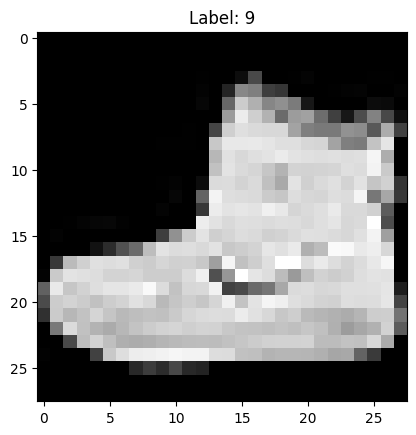

In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Explore the dataset
print(f"Training set shape: {train_images.shape}")
print(f"Number of training labels: {train_labels.shape}")
print(f"Test set shape: {test_images.shape}")
print(f"Number of test labels: {test_labels.shape}")

# Visualize the first image in the dataset
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


Class distribution: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


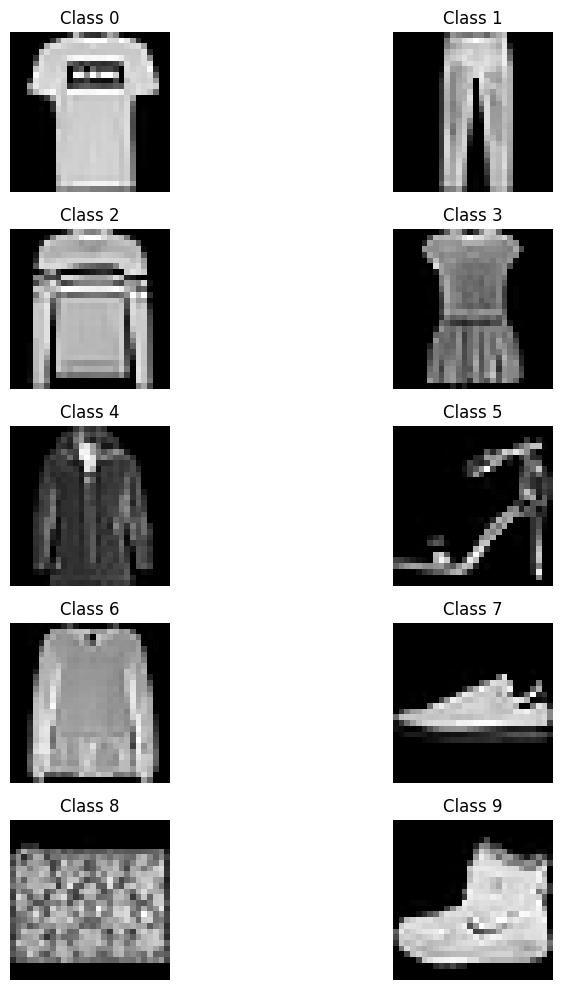

Pixel value range: 0 to 255


In [ ]:
# Import additional libraries
import numpy as np

# Analyze class distribution
unique, counts = np.unique(train_labels, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

# Visualize images from each class
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    class_images = train_images[train_labels == i]
    plt.imshow(class_images[0], cmap='gray')
    plt.title(f"Class {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Basic statistical analysis
print(f"Pixel value range: {train_images.min()} to {train_images.max()}")


In [ ]:
# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Normalize the pixel values and fit the model
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

history = model.fit(train_images_norm, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5157 - accuracy: 0.8202 - val_loss: 0.3958 - val_accuracy: 0.8622
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3857 - accuracy: 0.8617 - val_loss: 0.3621 - val_accuracy: 0.8667
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3460 - accuracy: 0.8750 - val_loss: 0.3736 - val_accuracy: 0.8698
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3207 - accuracy: 0.8819 - val_loss: 0.3459 - val_accuracy: 0.8772
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3000 - accuracy: 0.8899 - val_loss: 0.3505 - val_accuracy: 0.8708
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2854 - accuracy: 0.8944 - val_loss: 0.3454 - val_accuracy: 0.8750
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2736 - accuracy: 0.8982 - val_loss: 0.3161 - val_accuracy

313/313 - 1s - loss: 0.3345 - accuracy: 0.8816 - 1s/epoch - 3ms/step
Test accuracy: 0.881600022315979
313/313 [==============================] - 1s 2ms/step


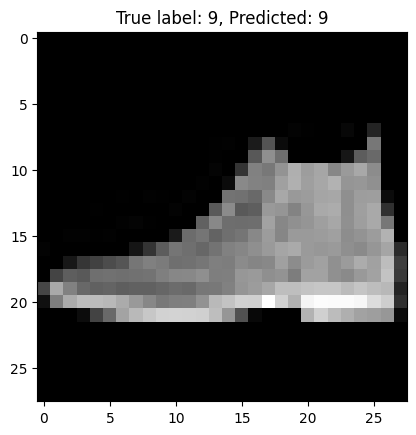

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_norm, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Make predictions
predictions = model.predict(test_images_norm)

# Display a test image with its predicted and true label
def display_prediction(index):
    plt.imshow(test_images[index], cmap='gray')
    plt.title(f"True label: {test_labels[index]}, Predicted: {np.argmax(predictions[index])}")
    plt.show()

display_prediction(0)  # Change the index to visualize different test images
